In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
inputs = df.drop(['day', 'play'], axis=1)
target = df['play']

In [4]:
from sklearn.preprocessing import LabelEncoder

le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()

In [5]:
inputs['outlook_n'] = le_outlook.fit_transform(inputs['outlook'])
inputs['temp_n'] = le_temp.fit_transform(inputs['temp'])
inputs['humidity_n'] = le_humidity.fit_transform(inputs['humidity'])
inputs['wind_n'] = le_wind.fit_transform(inputs['wind'])
target = le_play.fit_transform(target)

inputs


,outlook,temp,humidity,wind,outlook_n,temp_n,humidity_n,wind_n
0,Sunny,Hot,High,Weak,2,1,0,1
1,Sunny,Hot,High,Strong,2,1,0,0
2,Overcast,Hot,High,Weak,0,1,0,1
3,Rain,Mild,High,Weak,1,2,0,1
4,Rain,Cool,Normal,Weak,1,0,1,1
5,Rain,Cool,Normal,Strong,1,0,1,0
6,Overcast,Cool,Normal,Strong,0,0,1,0
7,Sunny,Mild,High,Weak,2,2,0,1
8,Sunny,Cool,Normal,Weak,2,0,1,1
9,Rain,Mild,Normal,Weak,1,2,1,1


In [8]:
inputs_n = inputs.drop(['outlook', 'temp', 'humidity', 'wind'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
model.score(X_test, y_test)

1.0

In [14]:
model.predict([[0,0,0,0]])

c:\Users\Rudyrdx\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[3]], dtype=int64)

3

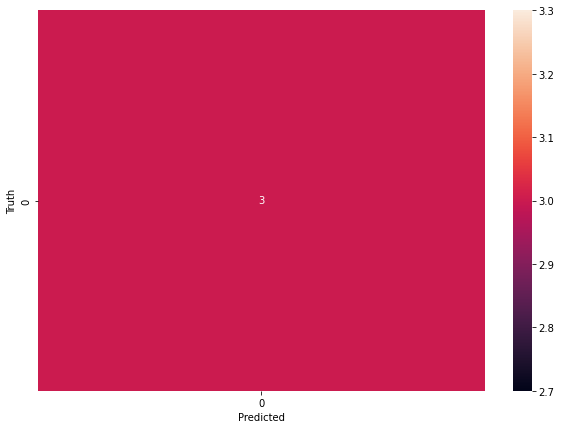

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
len(X_test)


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

